# Importing Libraries
1. Pandas
2. Numpy
3. Matplolib
4. Joblib


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import joblib

## Loading Data using pandas 

In [204]:
df=pd.read_csv(r"C:\Users\PAVAN G\Downloads\archive (1)\Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


**Data Preprocessing : Checking NA values**

In [205]:
df.isna()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


### Selecting X,Y Values from dataframe for Traing Model

In [206]:
x=df.drop(["label"],axis="columns")
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


**Import Sklearn library for Coverting Text to numbers using LabelEncoder API**

In [207]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [208]:
df["label"]=le.fit_transform(df["label"])

In [209]:
y=df["label"]
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int32

## Training Model
* Model - Random Forest
* Test score
* Prediction

In [210]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [211]:
x_train.shape

(1760, 7)

In [212]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)


In [213]:
model=rf.fit(x_train,y_train)

In [214]:
rf.score(x_test,y_test)

0.9954545454545455

In [215]:
yp=rf.predict(x_test)
yp

array([ 5,  7, 15, 13, 17, 18,  6, 21,  3, 15, 21, 15, 20,  5,  1, 15, 15,
        6, 20, 11,  8, 12, 14, 13,  9, 16, 10, 17, 21,  5,  2,  1,  4,  2,
        8, 18,  3, 15,  9, 19, 20, 13, 21,  6,  4, 12,  1,  9, 13,  2,  1,
        5, 14,  2,  6,  2, 10,  4, 16,  8, 13, 15, 13, 14, 21, 17, 11,  9,
        6, 13,  9, 17, 16,  3,  2, 19, 15,  8, 13,  4, 11, 14,  5,  7, 20,
       12,  7,  0,  8, 10, 21, 13, 13,  6, 13, 12,  5, 11,  5, 16, 17, 10,
        2,  2, 10, 13, 20,  3, 20,  8,  0, 19, 18,  2,  0,  3, 21,  4,  0,
        9, 18, 10,  5,  8, 11, 10, 11,  6,  3, 12,  3, 12, 16,  3, 12, 16,
       11, 16,  0, 18, 13, 14, 18, 20, 21,  0, 15, 16,  8,  5, 12,  9,  5,
        0,  4,  1, 21, 19, 18, 21,  3,  9,  1, 15, 15,  5,  9, 20,  2, 19,
       20, 13,  7, 12, 18,  5, 10, 21, 18,  0, 10, 19,  1,  9, 21, 19, 21,
       16,  6,  3,  6, 16,  3, 18, 18, 11,  8, 11, 13,  0,  9,  5, 20, 14,
        4,  7, 11, 11, 13, 20,  8, 12,  4, 12,  3,  1,  4,  7, 10, 10, 13,
        6, 17,  7, 19, 12

In [216]:
y_test[:5]

2142     5
1228     7
1461    15
565     13
1729    17
Name: label, dtype: int32

In [217]:
yp[:5]

array([ 5,  7, 15, 13, 17])

### Classification Report for every individual values

In [218]:
from sklearn.metrics import classification_report,confusion_matrix
cl=classification_report(y_test,yp)
print(cl)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        21
           8       0.94      0.94      0.94        17
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        26
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00        26
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        23
          17       1.00    

### Confusion Matrix

In [219]:
cm=confusion_matrix(y_test,yp)
cm.reshape(22,22)

array([[15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,

**Visualizing CM**

Text(95.72222222222221, 0.5, 'Truth')

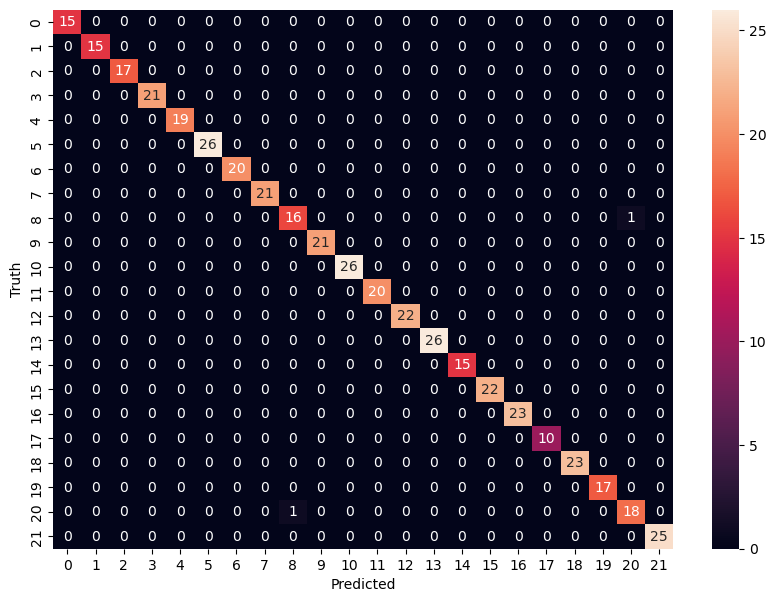

In [220]:

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel("Truth")

## Saving model using JOBLIB Library

In [222]:
joblib.dump(model, 'crop_prediction_model.pkl')
joblib.dump(le, 'le.pkl') 

['le.pkl']